In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

Matplotlib is building the font cache; this may take a moment.
<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
provider.backends()
from qiskit.providers.ibmq import least_busy
device = least_busy(provider.backends(filters=lambda b: b.configuration().n_qubits >= 4 and not b.configuration().simulator and b.status().operational==True))
device
from numpy import *
from qiskit import *
import matplotlib.pyplot as plt
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector

ibmqfactory.load_account:WARNING:2023-01-18 01:05:08,570: Credentials are already in use. The existing account in the session will be replaced.


In [8]:
state_0=array([]);
state_1=array([]);
phase_data=array([]);
q = QuantumRegister(1)
c = ClassicalRegister(1)
N_phase=10; # Step number of phase
shots=300; # Number of repetitions of each circuit
for i in range(N_phase):
    mz = QuantumCircuit(q,c) #Define circuit
    phase = 2*(i-1)*pi/15; # Step width of the phase = pi/15
    phase_data = append(phase_data,phase); 
    # Perform Mach-Zehnder interferometer
    mz.u(pi/2,pi/2,-pi/2,q); # Beam splitter BS1
    mz.p(-phase, q); # Phase shifter
    mz.u(pi/2,pi/2,-pi/2,q); # Beam splitter BS2
    mz.measure([0],[0]) # perform measurement
    job = execute(mz, backend=device, shots=500) # Perform experiment for 500 repetitions 
    result = job.result()
    data = result.get_counts();
    # Record probability to find each state in "state_0" and "state_1" 
    state_0=append(state_0,data['0']/shots); 
    state_1=append(state_1,data['1']/shots);

In [9]:
print(phase_data)

[-0.41887902  0.          0.41887902  0.83775804  1.25663706  1.67551608
  2.0943951   2.51327412  2.93215314  3.35103216]


In [10]:
print(state_0) 
print(state_1) 

[0.17333333 0.13       0.22333333 0.36666667 0.65       0.92666667
 1.29333333 1.49666667 1.61333333 1.60666667]
[1.49333333 1.53666667 1.44333333 1.3        1.01666667 0.74
 0.37333333 0.17       0.05333333 0.06      ]


In [7]:
device = least_busy(provider.backends(filters=lambda b: b.configuration().n_qubits >= 4 and not b.configuration().simulator and b.status().operational==True))
device

<IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>

In [11]:
job.result()

Result(backend_name='ibmq_quito', backend_version='1.1.36', qobj_id='f9ca39b8-bb01-471e-9a10-673b4fc81fc3', job_id='63c7712b0809f4ef93e204d8', success=True, results=[ExperimentResult(shots=500, success=True, meas_level=2, data=ExperimentResultData(counts={'0x0': 482, '0x1': 18}), header=QobjExperimentHeader(clbit_labels=[['c2', 0]], creg_sizes=[['c2', 1]], global_phase=3.0368728984701328, memory_slots=1, metadata={}, n_qubits=5, name='circuit-329', qreg_sizes=[['q', 5]], qubit_labels=[['q', 0], ['q', 1], ['q', 2], ['q', 3], ['q', 4]]), status=done)], date=2023-01-18 04:12:02+00:00, status=Successful completion, header=QobjHeader(backend_name='ibmq_quito', backend_version='1.1.36'), execution_id='416329b6-96e6-11ed-bf2d-b02628f7f59e', time_taken=2.1561453342437744, error=None, client_version={'qiskit': '0.39.2'})

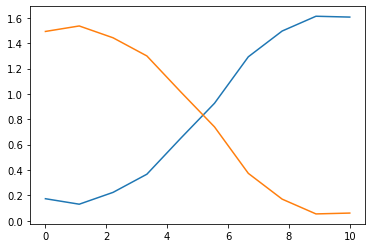

In [14]:
plt.plot(np.linspace(0,10,10),state_0,np.linspace(0,10,10),state_1)

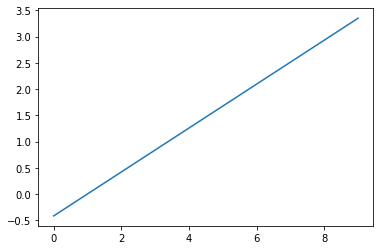

In [15]:
curve_fit=